In [686]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jayaantanaath/student-habits-vs-academic-performance")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Jakub\.cache\kagglehub\datasets\jayaantanaath\student-habits-vs-academic-performance\versions\1


In [687]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [688]:
sns.set(style="whitegrid")

In [689]:
file_path = os.path.join(path, "student_habits_performance.csv")
df = pd.read_csv(file_path)

df.head()


,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [690]:
print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nData Types:\n", df.dtypes)



Dataset Shape: (1000, 16)

Columns: ['student_id', 'age', 'gender', 'study_hours_per_day', 'social_media_hours', 'netflix_hours', 'part_time_job', 'attendance_percentage', 'sleep_hours', 'diet_quality', 'exercise_frequency', 'parental_education_level', 'internet_quality', 'mental_health_rating', 'extracurricular_participation', 'exam_score']

Data Types:
 student_id                        object
age                                int64
gender                            object
study_hours_per_day              float64
social_media_hours               float64
netflix_hours                    float64
part_time_job                     object
attendance_percentage            float64
sleep_hours                      float64
diet_quality                      object
exercise_frequency                 int64
parental_education_level          object
internet_quality                  object
mental_health_rating               int64
extracurricular_participation     object
exam_score                 

In [691]:
# Drop 'student_id'
df.drop('student_id', axis=1, inplace=True)

In [692]:
df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


In [693]:
categorical_cols = df.select_dtypes(include='object').columns
print(df[categorical_cols].describe())
print("\n")


        gender part_time_job diet_quality parental_education_level  \
count     1000          1000         1000                      909   
unique       3             2            3                        3   
top     Female            No         Fair              High School   
freq       481           785          437                      392   

       internet_quality extracurricular_participation  
count              1000                          1000  
unique                3                             2  
top                Good                            No  
freq                447                           682  




Missing Values:
 age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64


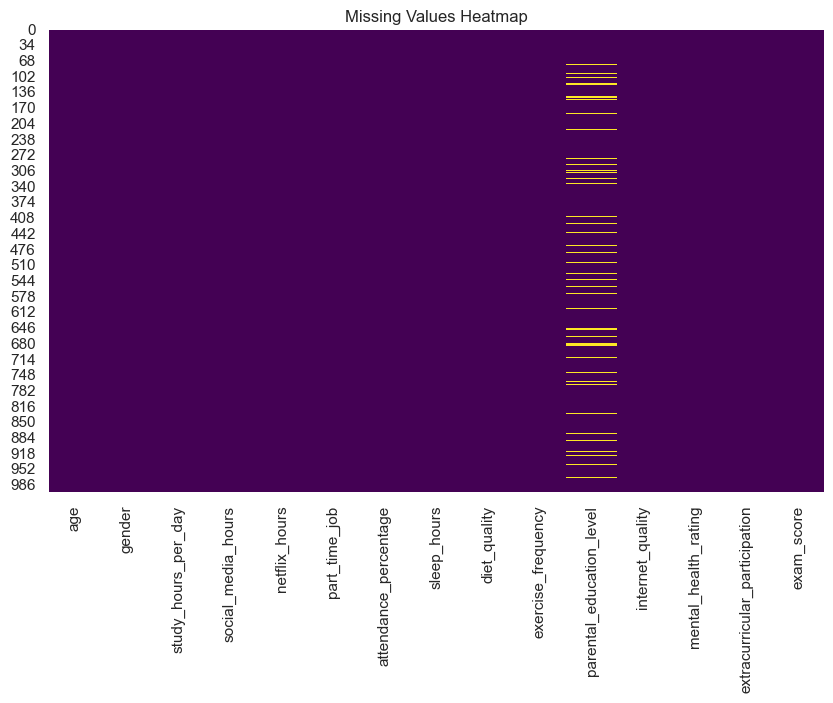

In [694]:
print("Missing Values:\n", df.isnull().sum())

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


In [695]:
for col in df.select_dtypes(include=['object']).columns:
    mode_value = df[col].mode()[0]
    df[col] = df[col].fillna(mode_value)

print("Missing Values After Handling:\n", df.isnull().sum())


Missing Values After Handling:
 age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
exam_score                       0
dtype: int64


In [696]:
df.drop_duplicates(inplace=True)
print("Dataset Shape After Removing Duplicates:", df.shape)
# There was none duplicates

Dataset Shape After Removing Duplicates: (1000, 15)


Text(0.5, 1.02, 'Numeric Feature Distributions with KDE')

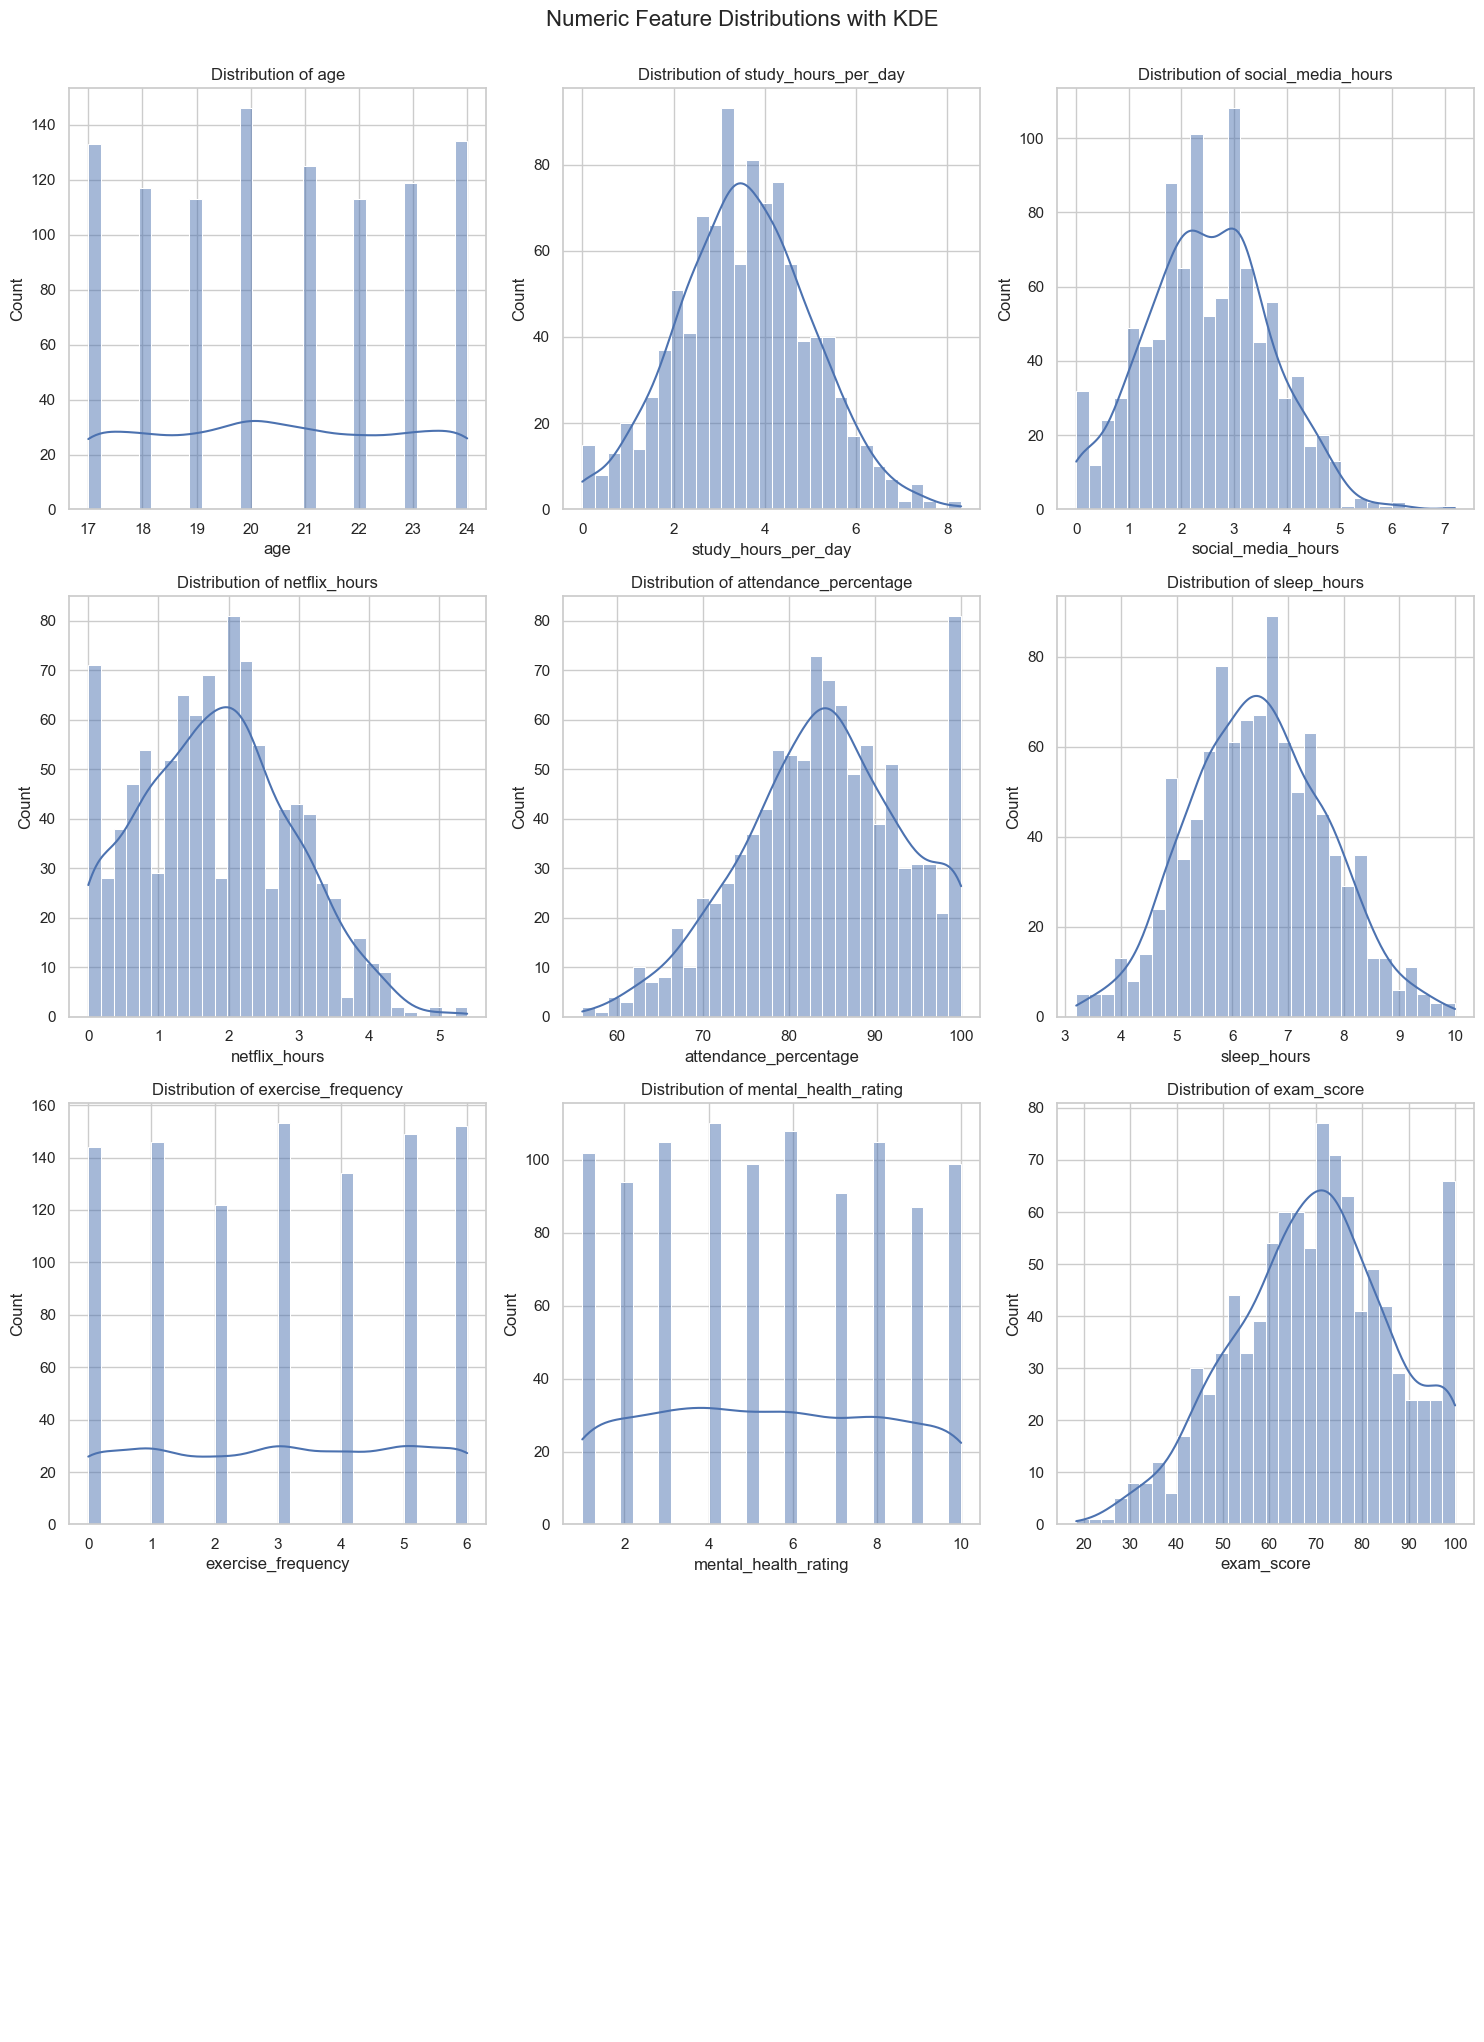

In [697]:
numeric_columns = df.select_dtypes(include='number').columns

num_cols = 3
num_rows_hist = (len(numeric_columns) // num_cols) + 1
num_rows_box = (len(numeric_columns) // num_cols) + 1
fig, axes = plt.subplots(num_rows_hist, num_cols, figsize=(15, 5 * num_rows_hist))
axes_hist = axes.flatten()

for i, col in enumerate(numeric_columns):
    sns.histplot(df[col], kde=True, bins=30, ax=axes_hist[i])
    axes_hist[i].set_title(f"Distribution of {col}")

for j in range(i + 1, len(axes_hist)):
    axes_hist[j].axis('off')

plt.tight_layout()
plt.suptitle("Numeric Feature Distributions with KDE", fontsize=16, y=1.02)




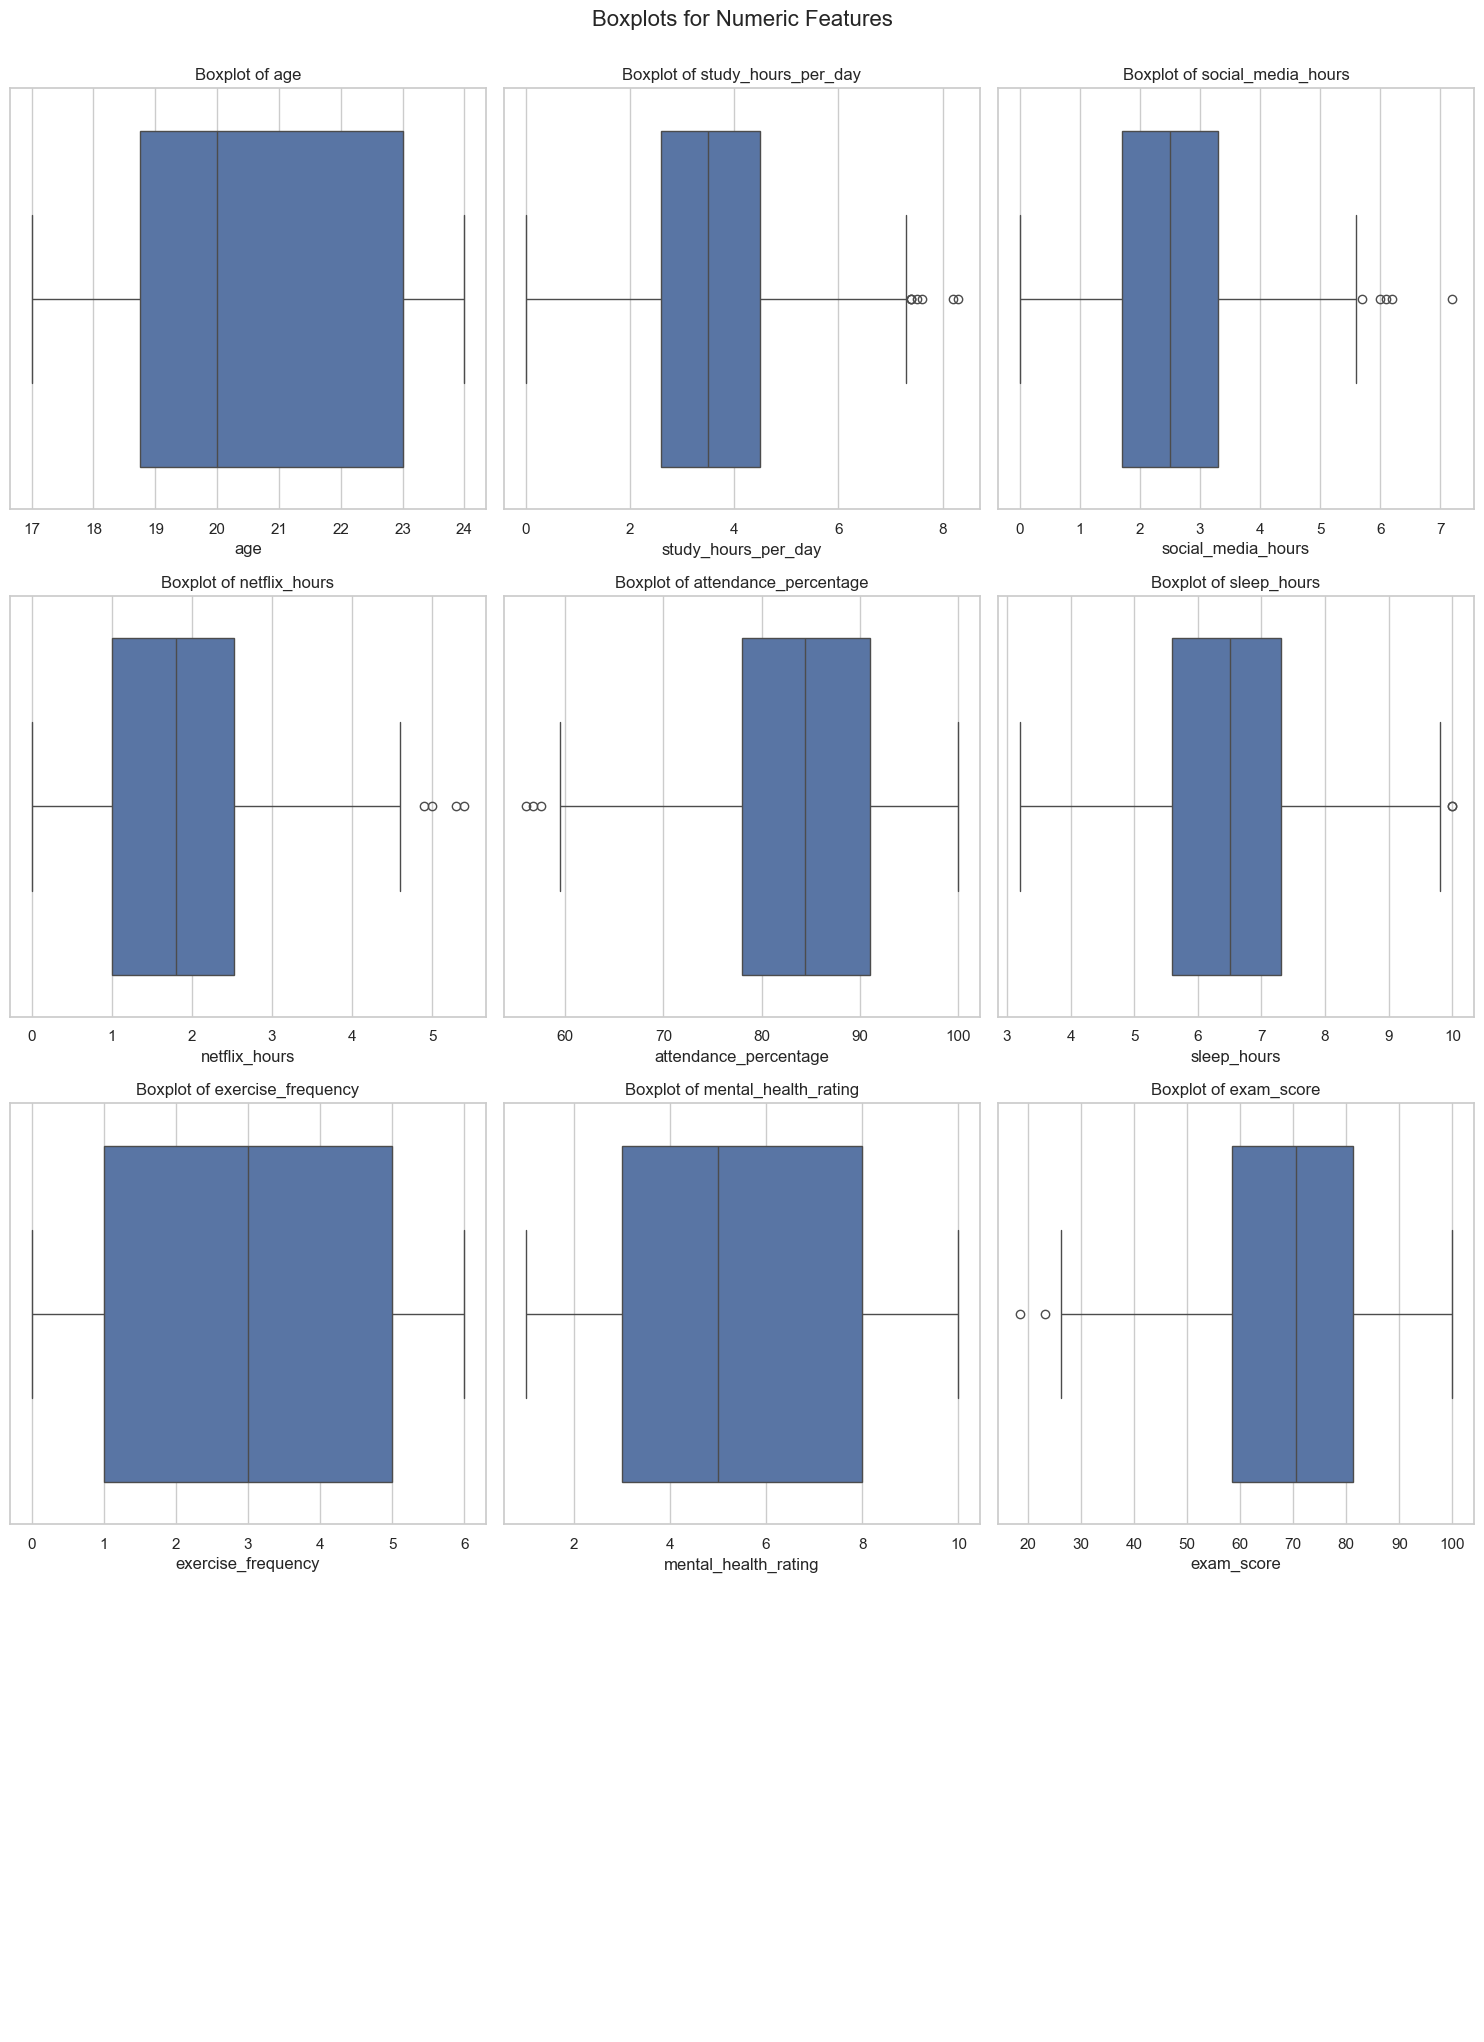

In [698]:
numeric_columns = df.select_dtypes(include='number').columns
fig, axes = plt.subplots(num_rows_box, num_cols, figsize=(15, 5 * num_rows_box))

axes_box = axes.flatten()

for i, col in enumerate(numeric_columns):
    sns.boxplot(x=df[col], ax=axes_box[i])
    axes_box[i].set_title(f"Boxplot of {col}")

for j in range(i + 1, len(axes_box)):
    axes_box[j].axis('off')

plt.tight_layout()
plt.suptitle("Boxplots for Numeric Features", fontsize=16, y=1.02)

plt.show()

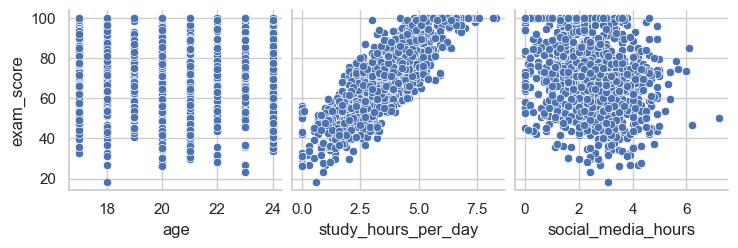

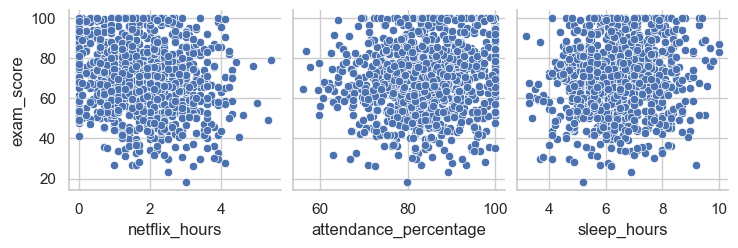

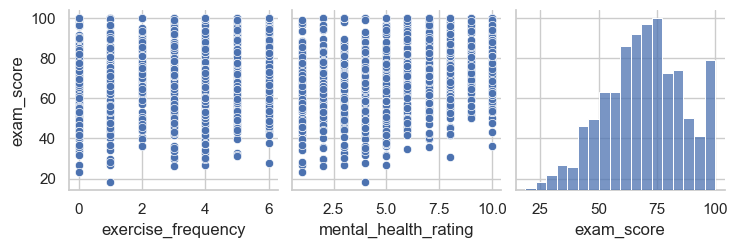

In [699]:
for i in range(0, len(numeric_columns),3):
    sns.pairplot(data=df[numeric_columns],
                x_vars=numeric_columns[i:i+3],
                y_vars=['exam_score'])

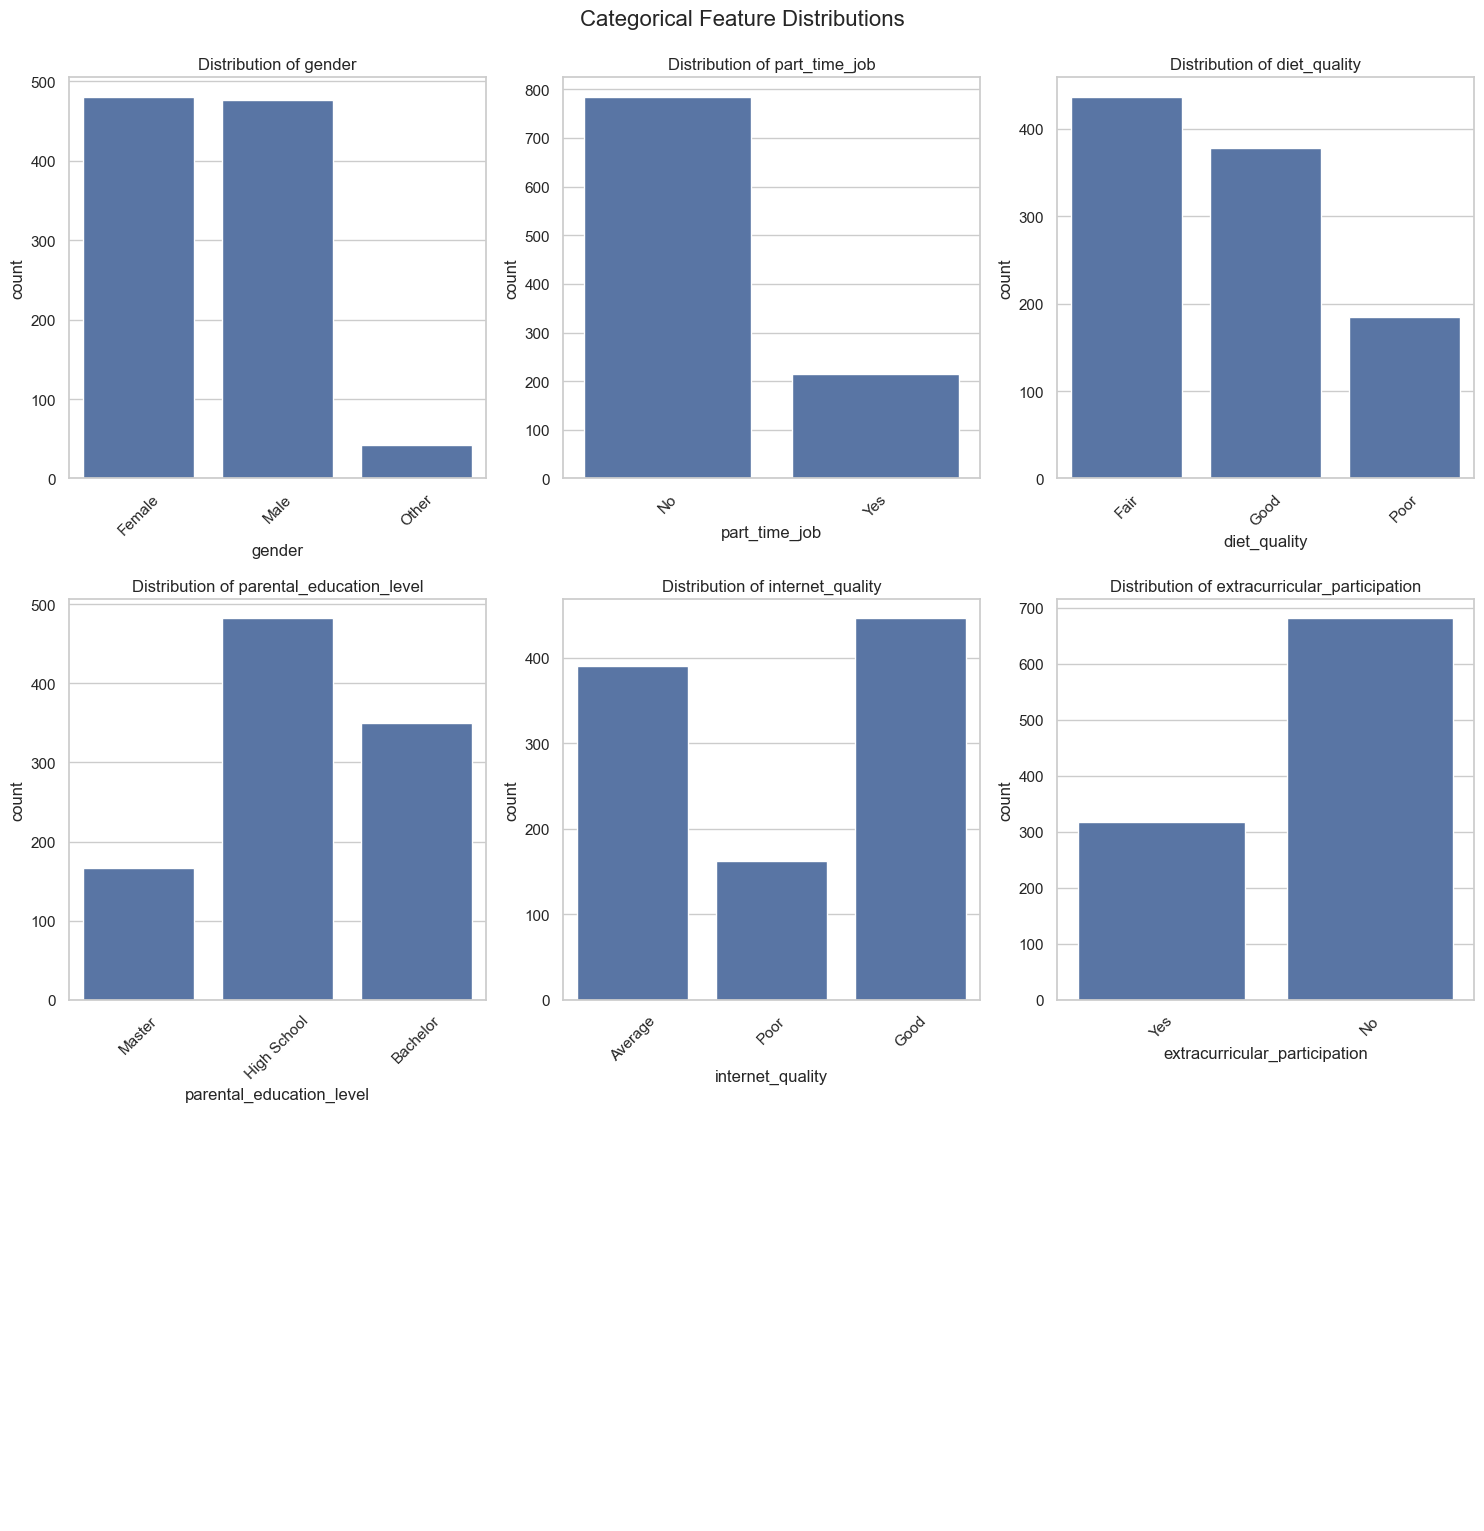

In [700]:
categorical_columns = df.select_dtypes(include='object').columns

num_cols = 3
num_rows = (len(categorical_columns) // num_cols) + 1
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.suptitle("Categorical Feature Distributions", fontsize=16, y=1.02)
plt.show()


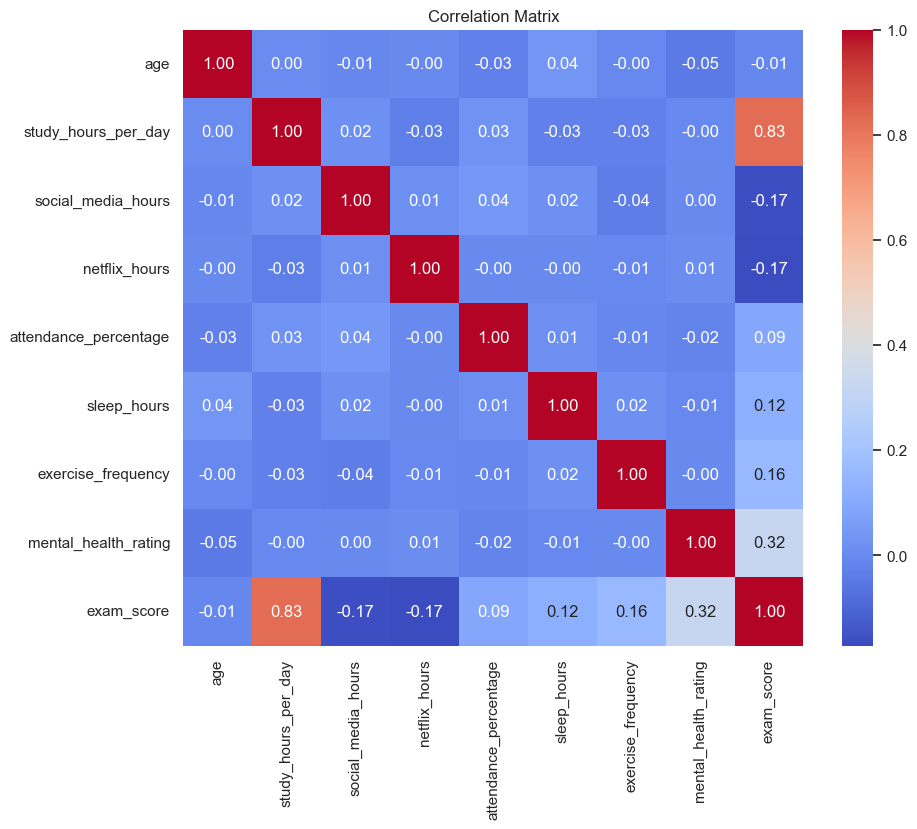

In [701]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


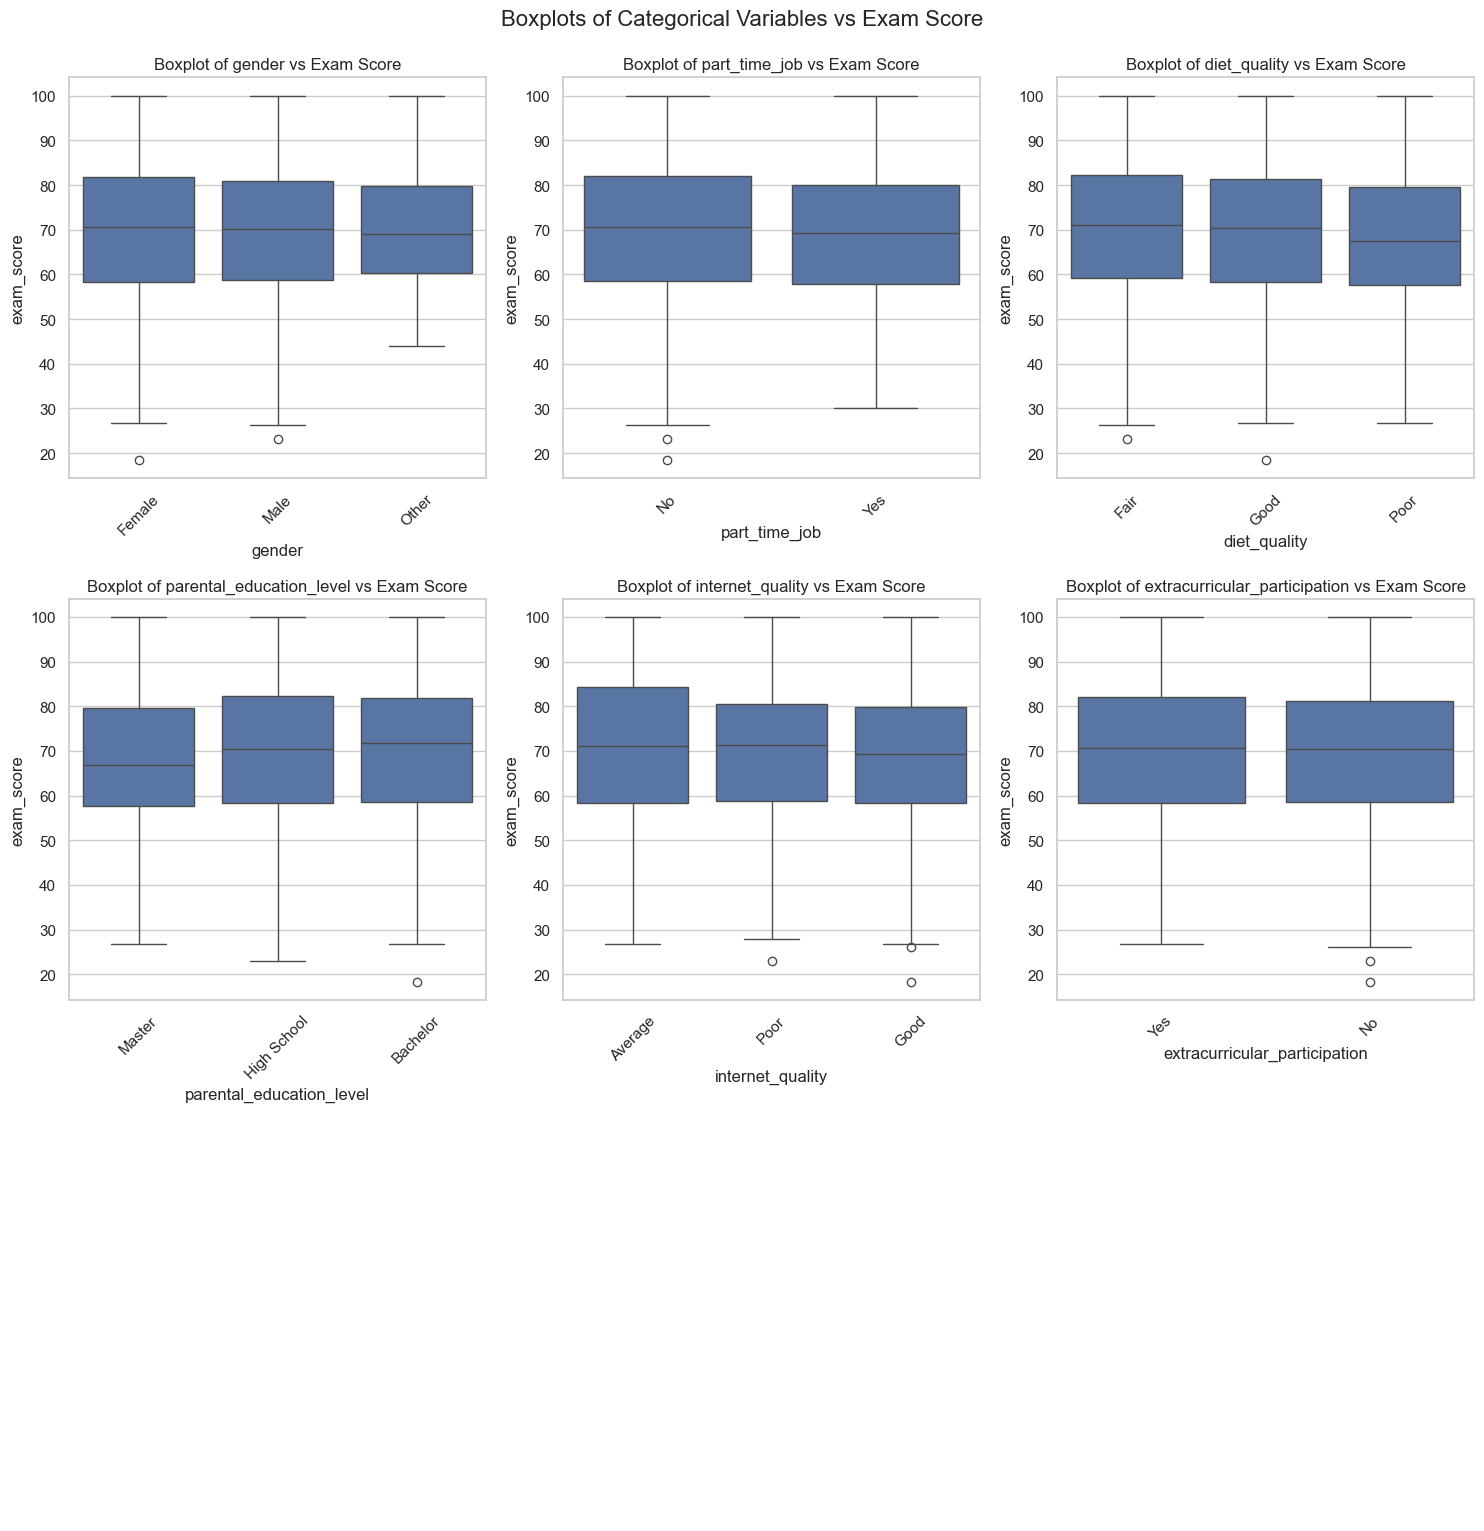

In [702]:
fig, axes = plt.subplots(nrows=(len(categorical_columns) // 3) + 1, ncols=3, figsize=(15, 5 * ((len(categorical_columns) // 3) + 1)))

for i, col in enumerate(categorical_columns):
    ax = axes[i // 3, i % 3]
    sns.boxplot(x=col, y='exam_score', data=df, ax=ax)
    ax.set_title(f"Boxplot of {col} vs Exam Score")
    ax.tick_params(axis='x', rotation=45)

for i in range(len(categorical_columns), len(axes.flatten())):
    axes.flatten()[i].axis('off')

plt.tight_layout()
plt.suptitle("Boxplots of Categorical Variables vs Exam Score", fontsize=16, y=1.02)
plt.show()


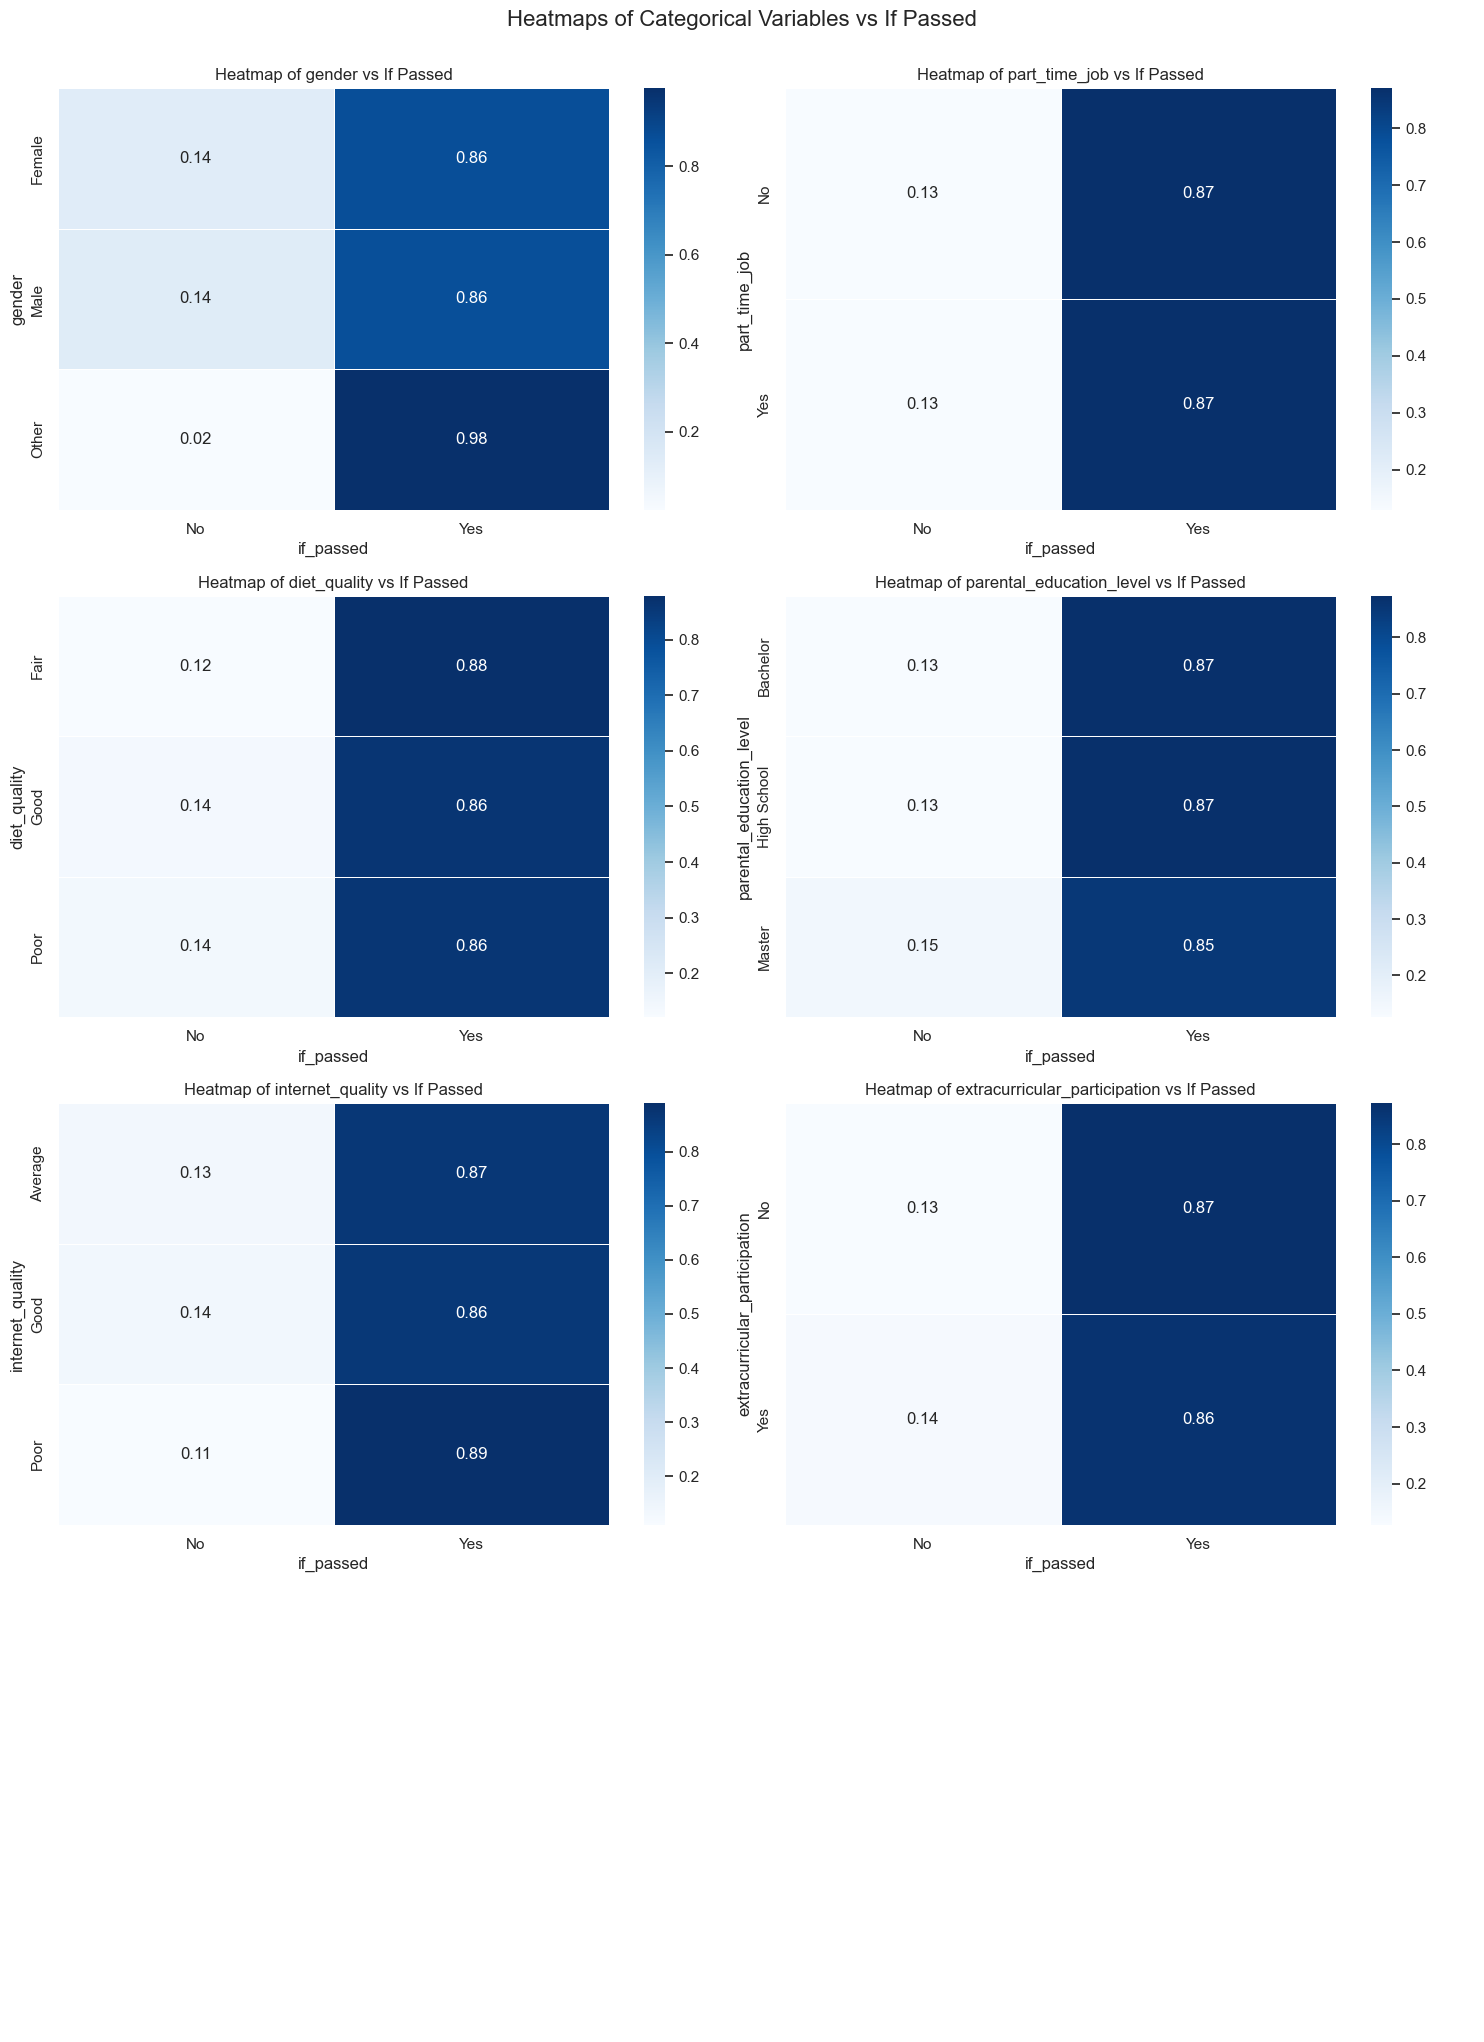

In [703]:
df['if_passed'] = df['exam_score'].apply(lambda x: 'Yes' if x > 50 else 'No')

categorical_columns = [col for col in categorical_columns if col != 'if_passed']

fig, axes = plt.subplots(nrows=(len(categorical_columns) // 2) + 1, ncols=2, figsize=(15, 5 * ((len(categorical_columns) // 2) + 1)))
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    ax = axes[i]
    contingency = pd.crosstab(df[col], df['if_passed'], normalize='index')
    sns.heatmap(contingency, annot=True, cmap="Blues", fmt='.2f', cbar=True, ax=ax, linewidths=0.5)
    ax.set_title(f"Heatmap of {col} vs If Passed")
    ax.set_ylabel(col)

for i in range(len(categorical_columns), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.suptitle("Heatmaps of Categorical Variables vs If Passed", fontsize=16, y=1.02)
plt.show()
